In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/mcgc.tsv", sep="\t")
df.head()

,time,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12
0,0,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1,15,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
2,30,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
3,45,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
4,60,0.003,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002


In [3]:
df.columns

Index(['time', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9',
       'B10', 'B11', 'B12', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'C11', 'C12'],
      dtype='object')

In [5]:
time = df["time"]

In [6]:
strain_mapping = {
    "Strain1_WT": ["A1", "A3", "B1", "B3", "C1", "C3"],
    "Strain1_MUT": ["A2", "A4", "B2", "B4", "C2", "C4"],
    "Strain2_WT": ["A5", "A7", "B5", "B7", "C5", "C7"],
    "Strain2_MUT": ["A6", "A8", "B6", "B8", "C6", "C8"],
    "Strain3_WT": ["A9", "A11", "B9", "B11", "C9", "C11"],
    "Strain3_MUT": ["A10", "A12", "B10", "B12", "C10", "C12"]
}

In [7]:
growth_curves = {}
for strain, cols in strain_mapping.items():
    growth_curves[strain] = df[cols].mean(axis=1)

growth_df = pd.DataFrame(growth_curves)
growth_df.insert(0, 'time', time)

In [8]:
def time_to_carrying_capacity(od_data, time_points, threshold=0.9):
    max_od = max(od_data)
    carrying_threshold = max_od * threshold
    return time_points[np.argmax(od_data >= carrying_threshold)]

In [9]:
carrying_times = []
for strain in growth_curves.keys():
    time_reached = time_to_carrying_capacity(growth_df[strain], time)
    condition = 'WT' if 'WT' in strain else 'MUT'
    carrying_times.append({'Strain': strain.split('_')[0], 'Condition': condition, 'Time': time_reached})

carrying_times_df = pd.DataFrame(carrying_times)

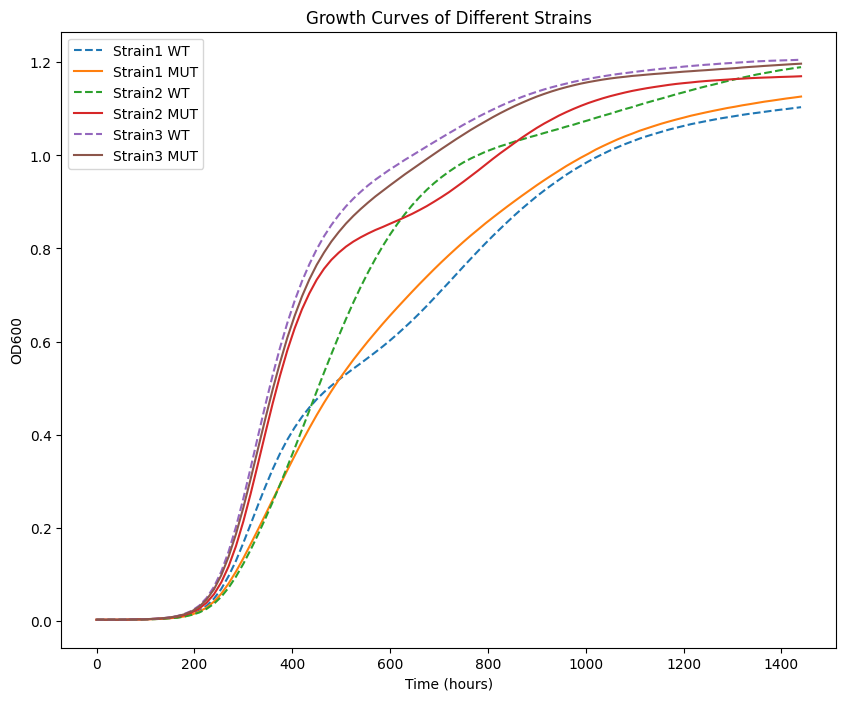

In [12]:
plt.figure(figsize=(10, 8))
for strain in ['Strain1', 'Strain2', 'Strain3']:
    plt.plot(time, growth_df[f'{strain}_WT'], label=f'{strain} WT', linestyle='--')
    plt.plot(time, growth_df[f'{strain}_MUT'], label=f'{strain} MUT')
plt.xlabel("Time (hours)")
plt.ylabel("OD600")
plt.title("Growth Curves of Different Strains")
plt.legend()
plt.show()

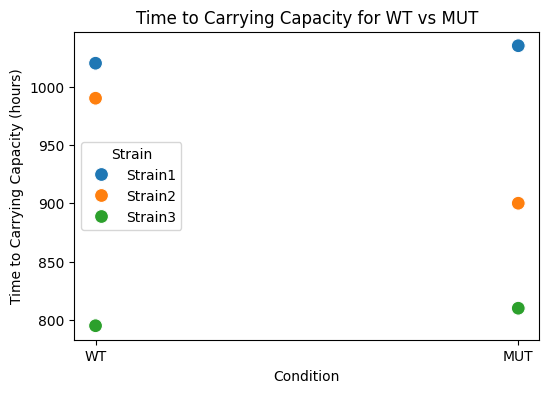

In [13]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=carrying_times_df, x='Condition', y='Time', hue='Strain', s=100)
plt.title("Time to Carrying Capacity for WT vs MUT")
plt.xlabel("Condition")
plt.ylabel("Time to Carrying Capacity (hours)")
plt.show()


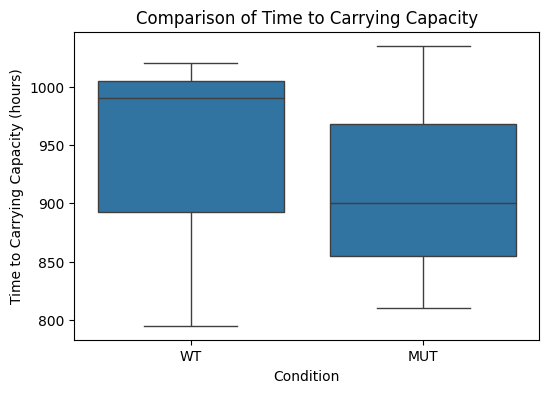

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=carrying_times_df, x='Condition', y='Time')
plt.title("Comparison of Time to Carrying Capacity")
plt.xlabel("Condition")
plt.ylabel("Time to Carrying Capacity (hours)")
plt.show()

In [18]:
t_stat, p_value = ttest_ind(
    carrying_times_df[carrying_times_df['Condition'] == 'WT']['Time'],
    carrying_times_df[carrying_times_df['Condition'] == 'MUT']['Time'],
    equal_var=False  # Assuming different variances
)

print(f"T-test result: t={t_stat:.3f}, p={p_value:.3f}")

T-test result: t=0.208, p=0.845


In [19]:
if p_value < 0.05:
    print("There is a significant difference in time to carrying capacity between WT and MUT strains.")
else:
    print("There is no significant difference in time to carrying capacity between WT and MUT strains.")


There is no significant difference in time to carrying capacity between WT and MUT strains.


In [20]:

# Observations:
# 1. The growth curves for WT and MUT strains are overlaid for comparison.
# 2. The scatter plot shows variation in time to carrying capacity for each strain under WT and MUT conditions.
# 3. The box plot helps visualize the distribution of time to carrying capacity.
# 4. The statistical test determines whether the time difference between WT and MUT is significant.